In [1]:
# Starting Your ML Project
import pandas as pd

melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
print(melbourne_data.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [2]:
# Selecting and Filtering in Pandas
import pandas as pd

file_path = '../input/house-prices-advanced-regression-techniques/train.csv'
data = pd.read_csv(file_path)
print(data.columns)

price_data = data.SalePrice
print(price_data.head())

columns_of_interest = ['MSSubClass', 'OverallCond']
two_columns_of_data = data[columns_of_interest]

two_columns_of_data.describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,MSSubClass,OverallCond
count,1460.000000,1460.000000
mean,56.897260,5.575342
std,42.300571,1.112799
min,20.000000,1.000000
25%,20.000000,5.000000
50%,50.000000,5.000000
75%,70.000000,6.000000
max,190.000000,9.000000


In [3]:
# Your First Scikit-Learn Model
y = data.SalePrice

predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

X = data[predictors]

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X, y)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[208500. 181500. 223500. 140000. 250000.]


In [4]:
# Model Validation
from sklearn.model_selection import train_test_split

xTrain, xValidate, yTrain, yValidate = train_test_split(X, y, random_state=0)
model.fit(xTrain, yTrain)
predictions = model.predict(xValidate)


from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(yValidate, predictions))

33024.397260273974


In [5]:
# Underfitting, Overfittting and Model Optimization
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, xTrain, xValidate, yTrain, yValidate)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))

# Best max_leaf_nodes: 50

Max leaf nodes: 5 		 Mean Absolute Error: 35190
Max leaf nodes: 50 		 Mean Absolute Error: 27825
Max leaf nodes: 500 		 Mean Absolute Error: 32662
Max leaf nodes: 5000 		 Mean Absolute Error: 33382


In [6]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(xTrain, yTrain)
forest_preds = forest_model.predict(xValidate)
print(mean_absolute_error(yValidate, forest_preds))

23917.63601826484


In [7]:
# Submitting From A Kernel
import numpy as np

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

train_y = train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

train_X = train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)

test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_X = test[predictor_cols]
predicted_prices = my_model.predict(test_X)
print(predicted_prices)

my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('../output/submission.csv', index=False)

[135650. 205750. 154290. ... 143504. 140700. 255500.]


In [8]:
# Handling Missing Values
predictors = data.drop(['SalePrice'], axis=1)
numeric_predictors = predictors.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(numeric_predictors, y, train_size=0.7, test_size=0.3, random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

# only full columns
cols_with_missing = [col for col in X_train.columns
                    if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

# only imputed columns
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

# renaming imputed columns
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns
                    if X_train[col].isnull().any())

for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
18866.125114155253
Mean Absolute Error from Imputation:
18794.83310502283
Mean Absolute Error from Imputation while Track What Was Imputed:
19312.108219178077


In [9]:
# Using Categorical Data with One Hot Encoding
from sklearn.model_selection import cross_val_score

def get_mae(X, y): 
    return -1 * cross_val_score(RandomForestRegressor(50), 
                               X, y, 
                               scoring = 'neg_mean_absolute_error').mean()

# get categorical columns with no null values in
predictors_categorical_only = predictors.select_dtypes(include=['object'])
predictors_full_categorical_only = [col for col in predictors_categorical_only.columns
                                   if not predictors_categorical_only[col].isnull().any()]
# getdummies
categorical_predictors = data[predictors_full_categorical_only]
categorical_predictors_dummies = pd.get_dummies(categorical_predictors)

# already have numeric_predictors, so concatenate the two sets of features
concat_predictors = pd.concat([numeric_predictors, categorical_predictors_dummies], axis=1, sort=False)

target = y.values

xTrain, xValidate, yTrain, yValidate = train_test_split(concat_predictors, target, train_size=0.7, test_size=0.3, random_state=0)

my_imputer = Imputer()
xTrain = my_imputer.fit_transform(xTrain)
xValidate = my_imputer.transform(xValidate)

print("Mean Absolute Error: ")
print(score_dataset(xTrain, xValidate, yTrain, yValidate))
print("Negative Mean Cross Validated Absolute Error")
print(get_mae(np.concatenate((xTrain, xValidate)), np.concatenate((yTrain, yValidate))))

Mean Absolute Error: 
20086.321461187217
Negative Mean Cross Validated Absolute Error
18306.304593279874


In [10]:
# Learning to Use XGBoost
from xgboost import XGBRegressor

def score_dataset_xgboost(X_train, X_test, y_train, y_test):
    model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
    model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

xTrain, xValidate, yTrain, yValidate = train_test_split(concat_predictors, target, train_size=0.7, test_size=0.3, random_state=0)

my_imputer = Imputer()
xTrain = my_imputer.fit_transform(xTrain)
xValidate = my_imputer.transform(xValidate)

print("Mean Absolute Error: ")
print(score_dataset_xgboost(xTrain, xValidate, yTrain, yValidate))

Mean Absolute Error: 
16801.577580978883


Mean Absolute Error: 16227.14480949278


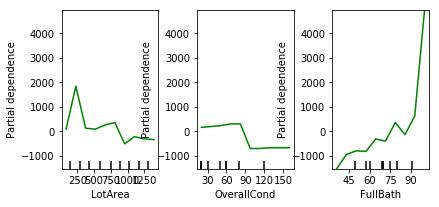

In [15]:
# Partial Dependence Plots
from sklearn.ensemble import GradientBoostingRegressor

xTrain, xValidate, yTrain, yValidate = train_test_split(concat_predictors, target, train_size=0.7, test_size=0.3, random_state=0)

my_imputer = Imputer()
xTrain = my_imputer.fit_transform(xTrain)
xValidate = my_imputer.transform(xValidate)

gbRegressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05)
gbRegressor.fit(xTrain, yTrain)
print("Mean Absolute Error: " + str(mean_absolute_error(yValidate, gbRegressor.predict(xValidate))))

from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

my_plots = plot_partial_dependence(gbRegressor, 
                                   features=[0,1,2],
                                   X=xTrain, 
                                   feature_names=['LotArea', 'OverallCond', 'FullBath'], 
                                   grid_resolution=10)

In [12]:
# Pipelines
from sklearn.pipeline import make_pipeline

xTrain, xTest, yTrain, yTest = train_test_split(concat_predictors, target, train_size=0.7, test_size=0.3, random_state=0)

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor(50))
my_pipeline.fit(xTrain, yTrain)
predictions = my_pipeline.predict(xTest)
print("Mean Absolute Error: " + str(mean_absolute_error(yTest, predictions)))

Mean Absolute Error: 17899.49575342466


In [13]:
# Cross-Validation
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor(50))
scores = cross_val_score(my_pipeline, concat_predictors, target, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

concat_predictors_minus_LotArea = concat_predictors.drop(['LotArea'], axis=1)
concat_predictors_minus_OverallCond = concat_predictors.drop(['OverallCond'], axis=1)
concat_predictors_minus_FullBath = concat_predictors.drop(['FullBath'], axis=1)

pipeline_minus_LotArea = make_pipeline(Imputer(), RandomForestRegressor(50))
pipeline_minus_OverallCond = make_pipeline(Imputer(), RandomForestRegressor(50))
pipeline_minus_FullBath = make_pipeline(Imputer(), RandomForestRegressor(50))

scores_minus_LotArea = cross_val_score(pipeline_minus_LotArea, concat_predictors_minus_LotArea, target, scoring='neg_mean_absolute_error')
scores_minus_OverallCond = cross_val_score(pipeline_minus_OverallCond, concat_predictors_minus_OverallCond, target, scoring='neg_mean_absolute_error')
scores_minus_FullBath = cross_val_score(pipeline_minus_FullBath, concat_predictors_minus_FullBath, target, scoring='neg_mean_absolute_error')

print('Mean Absolute Error minus LotArea %2f' %(-1 * scores_minus_LotArea.mean()))
print('Mean Absolute Error minus OverallCond %2f' %(-1 * scores_minus_OverallCond.mean()))
print('Mean Absolute Error minus FullBath %2f' %(-1 * scores_minus_FullBath.mean()))

[-17497.34349076 -17934.74250513 -19048.98061728]
Mean Absolute Error 18160.355538
Mean Absolute Error minus LotArea 18176.595977
Mean Absolute Error minus OverallCond 18538.473396
Mean Absolute Error minus FullBath 18190.263472


In [14]:
# Data leakage
# No exercise. 